In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, recall_score


In [53]:
data = pd.read_csv('../data/raw/creditcard.csv.zip')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
data.shape

(284807, 31)

In [78]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [110]:
def strat_split(df,target,test_size,seed):
        
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    for train_index, test_index in split.split(df, df[f"{target}"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
    return strat_train_set,strat_test_set

In [111]:
class_vals = data['Class'].value_counts()
print(class_vals)
# ax = sns.barplot(x=cyl_vals.index,y = cyl_vals.values,data=data)
# ax.set(xlabel='count', ylabel='no of cylinders')


0    284315
1       492
Name: Class, dtype: int64


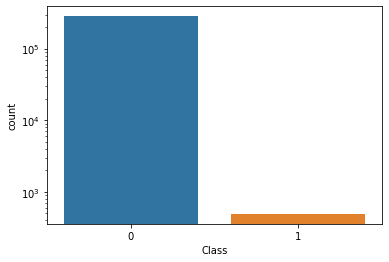

In [112]:
g = sns.countplot(x='Class',data=data)
g.set_yscale("log")
# g.set_ylim(0.05, 1000)

In [113]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [114]:
train_data,val_df = strat_split(data,'Class',0.2,42)
print(train_data.shape,val_df.shape)
train_data_class_vals = train_data['Class'].value_counts()
val_class_vals = val_df['Class'].value_counts()
print(train_data_class_vals)
print(val_class_vals)

(227845, 31) (56962, 31)
0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [120]:
train_data = train_data.reset_index(drop=True)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [121]:
train_df,test_df = strat_split(train_data,'Class',0.2,42)
print(train_df.shape,test_df.shape)
train_class_vals = train_df['Class'].value_counts()
test_class_vals = test_df['Class'].value_counts()
print(train_class_vals)
print(test_class_vals)

(182276, 31) (45569, 31)
0    181961
1       315
Name: Class, dtype: int64
0    45490
1       79
Name: Class, dtype: int64


In [115]:
# def is_balanced_splitting(y):
#     counts = np.bincount(y)
#     return counts[1] / (sum(counts))
# print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(train_df.Class) * 100))
# print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(test_df.Class) * 100))
# print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(val_df.Class) * 100))

# Training

In [143]:
x_train = train_df.drop('Class',axis=1)
y_train = train_df['Class']

x_test = test_df.drop('Class',axis=1)
y_test = test_df['Class']

x_val = val_df.drop('Class',axis=1)
y_val = val_df['Class']


In [144]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_val_pred = log_reg.predict(x_val)

# Testing

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

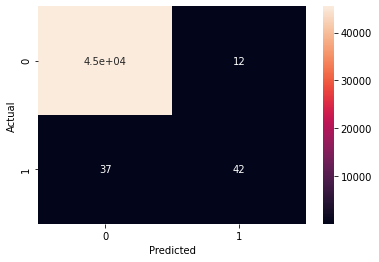

In [125]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [137]:
print(confusion_matrix)

Predicted      0   1
Actual              
0          45478  12
1             37  42


In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.78      0.53      0.63        79

    accuracy                           1.00     45569
   macro avg       0.89      0.77      0.82     45569
weighted avg       1.00      1.00      1.00     45569



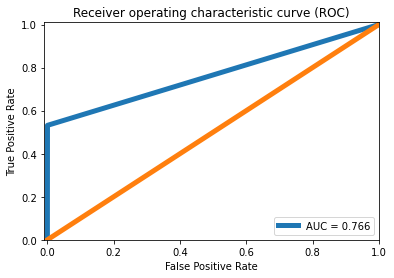

In [132]:
#Plotting the ROC-AUC Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) Test')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Validation

In [145]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.68      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [147]:
print(confusion_matrix)

Predicted      0   1
Actual              
0          45478  12
1             37  42


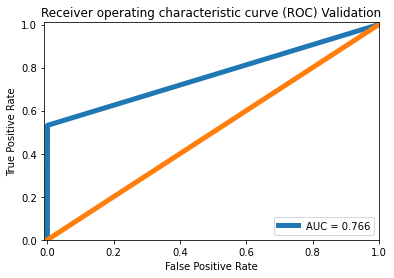

In [146]:
#Plotting the ROC-AUC Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()